<a href="https://colab.research.google.com/github/Pechuguin/Modelos_de_regresion_lineal/blob/main/Copia_de_Actividad5Equipo3Grupo301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from pandas.tseries.frequencies import DateOffset

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
%pip install funpymodeling

In [ ]:
import seaborn as sns
from funpymodeling.exploratory import freq_tbl
#Librerias para la graficacion de datos

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#Mostrar todas las columnas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
#Carga desde un archivo .csv sin indice
df= pd.read_csv("cuentas_credicel.csv", encoding= 'latin')

<ipython-input-121-1823571d8c31>:2: DtypeWarning: Columns (26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("cuentas_credicel.csv", encoding= 'latin')


In [ ]:
df.head(10)

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,agente_venta,dis_venta,status,fraude,empresa,inversion,pagos_realizados,reautorizacion,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,puntos,riesgo,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,3,HDNAWQ3A,30,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,81,1169.0,2106,0.0,Sintia Verenice Tenorio Perez E,mic0437,2,0,microtec,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,26.0,NaN
1,4,M418YNR4,33,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,225,1949.0,2925,0.0,Alvaro Rafael Pascual,mic015,2,0,microtec,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,13.0,NaN
2,5,SZ7V3NZT,37,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Sintia Verenice Tenorio Perez E,mic0437,3,0,microtec,0,0,0,NaN,NaN,NaN,NaN,Cancelado,0.0,0.0,0.0,0,0.0,NaN,NaN,74,NaN,NaN
3,6,9I08UIQZ,38,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Luz Aylin Hernandez Lopez1,mic0748,2,0,microtec,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,13.0,NaN
4,7,JMF4LKYU,44,13/11/2021 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,178,3224.0,6942,0.0,Sintia Verenice Tenorio Perez E,mic0437,1,0,microtec,0,0,0,05/03/2022 00:00,12/03/2022 00:00,Mora,0.0,0,0.0,0.0,0.0,NaN,NaN,74,NaN,NaN,NaN,NaN
5,8,FOBQ8A27,49,13/11/2021 16:50,MOTOROLA,LTE XT2097-12 E7I POWER Azul,26S,2999.0,750.0,0.0,156,2249.0,4056,0.0,Karim Hassan Mendez Animas GP,mic0569,2,0,microtec,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,26.0,NaN
6,9,UND81DCF,50,13/11/2021 17:19,MOTOROLA,E7I POWER 2+32 GB AZUL B,26S,2999.0,900.0,0.0,145,2099.0,3770,0.0,Luis Gerardo Almanzar Hernandez,mic0437,2,0,microtec,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,26.0,NaN
7,10,LMC1PBLV,54,14/11/2021 11:19,MOTOROLA,LTE XT2128-1 G20 Rosa,13S,3999.0,1500.0,0.0,288,2499.0,3744,0.0,Mayra Jazmin Reyes Patino,mic0666,2,0,microtec,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,13.0,NaN
8,11,5SDZN7O1,59,14/11/2021 13:34,KODAK,LTE SEREN D60LX Azul,26S,2889.0,1000.0,0.0,131,1889.0,3406,0.0,Luis Gerardo Almanzar Hernandez,mic0437,2,0,microtec,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,26.0,NaN
9,12,R523EMQT,62,14/11/2021 14:54,NOKIA,NOKIA 2.4 3+64 GB GRIS B,26S,2999.0,750.0,0.0,156,2249.0,4056,0.0,Rita Dalia Morales Flores,mic08q,1,0,microtec,0,15,0,03/09/2022 00:00,06/12/2022 00:00,Mora,0.0,0,0.0,0.0,0.0,NaN,NaN,74,NaN,NaN,NaN,NaN


In [ ]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [ ]:
#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

In [ ]:
#Eliminar un signo de una columna
df['plazo']=df['plazo'].str.replace('S', '')

In [ ]:
#Conversión de tipo de dato de columna de tipo Object a int
df['plazo']= df['plazo'].astype(int)

In [ ]:
#Compruebo que la columna plazo ya se halla convertido a tipo numérico
df.info()

In [ ]:
#Sustituyo valores nulos por el numero "0"
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en  concreto
df["riesgo"]= df["riesgo"].fillna(0)

In [ ]:
#Analizar categorias de una columna
riesgo_categorias = df.groupby(['riesgo'])['riesgo'].count()
riesgo_categorias

In [ ]:
#Sustituyo los strings Atraso, Cancelado y Fraude por la constante "0"
df['riesgo']=df['riesgo'].str.replace('Atraso', '0')
df['riesgo']=df['riesgo'].str.replace('Cancelado', '0')
df['riesgo']=df['riesgo'].str.replace('Fraude', '0')

In [ ]:
#Conversión de tipo de dato de columna de tipo Object a int
df['riesgo']= df['riesgo'].astype(float)

In [ ]:
#Sexto método de sustitución de valores nulos
#Sustituir valores nulos por valores no nulos hacia atrás backward fill" ("bfill")
#Filtro por columnas
df["empresa"] =df["empresa"].fillna(method="bfill")

In [ ]:
#Sexto método de sustitución de valores nulos
#Sustituir valores nulos por valores no nulos hacia atrás backward fill" ("bfill")
#Filtro por columnas
df["fecha_ultimo_pago"] =df["fecha_ultimo_pago"].fillna(method="bfill")

In [ ]:
#Filtro por columnas
df["fecha_pago_proximo"] =df["fecha_pago_proximo"].fillna(method="bfill")

In [ ]:
df["razones_buro"] =df["razones_buro"].fillna(method="ffill")

In [ ]:
df["semana_actual"] =df["semana_actual"].fillna(method="bfill")

In [ ]:
df["Unnamed: 33"] =df["Unnamed: 33"].fillna(method="bfill")

In [ ]:
df["Unnamed: 34"] =df["Unnamed: 34"].fillna(method="bfill")
df["Unnamed: 34"] =df["Unnamed: 34"].fillna(method="ffill")

In [ ]:
df["Unnamed: 35"]=df["Unnamed: 35"].fillna(method="ffill")
df["Unnamed: 35"]=df["Unnamed: 35"].fillna(method="bfill")

In [ ]:
df["Unnamed: 36"]=df["Unnamed: 36"].fillna(method="ffill")
df["Unnamed: 36"]=df["Unnamed: 36"].fillna(method="bfill")

In [ ]:
df["puntos"] =df["puntos"].fillna(0.0)

In [ ]:
df["porc_enganche"] =df["porc_enganche"].fillna(0.0)

In [ ]:
df["status_cuenta"]=df["status_cuenta"].fillna(method="ffill")

In [ ]:
df["riesgo"]=df["riesgo"].fillna(method="ffill")
df["riesgo"]=df["riesgo"].fillna(method="bfill")

In [ ]:
df["codigo_postal"]=df["codigo_postal"].fillna(method="bfill")

In [ ]:
#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         4
puntos                0
riesgo                0
porc_enganche         0
porc_tasa             0
score_buro            0
razones_buro          0
semana_actual         0
codigo_postal         0
Unnamed: 33           0
Unnamed: 34           0
Unnamed: 35           0
Unnamed: 36           0
dtype: int64

In [ ]:
df.head(15)

In [ ]:
#Verificamos información del DataFrame
df.info()

**Outliers**

In [ ]:
#filtro PARA obtener variables cuantitativas
CUANTITATIVAS=df.iloc[:,[0,2,6,7,8,9,10,11,12,13,17,19,20,21,25,26,27,28,29,35,36]]#VARIABLES cuantitativas, columnnas
CUANTITATIVAS


<Figure size 1500x800 with 0 Axes>

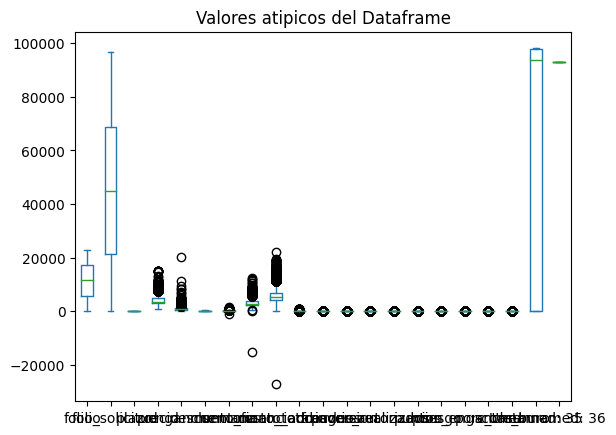

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(15,8))
CUANTITATIVAS.plot(kind="box",vert=True)
plt.title("Valores atipicos del Dataframe")
plt.show()#DIBUJAMOS EL DIAGRAMA

In [ ]:
#Metodo de desviacion estandar
Y=CUANTITATIVAS
Limite_superior=Y.mean()+3*Y.std()
Limite_inferior=Y.mean()-3*Y.std()
print("Limite superior permitido",Limite_superior)
print("Limite inferior permitido",Limite_inferior)
#Calculando rango entre los limites


In [ ]:
#Obtenemos datos dentro de los rangos, insiders. Obtenemos datos y los outliers se convierten en nulo en el DATAFRAME
Datos_sin_outliers=CUANTITATIVAS[(Y<=Limite_superior)&(Y>=Limite_inferior)]
Datos_sin_outliers
#Convertimos los outliers en valores Nulos


In [ ]:
#Reemplazamos valores atipicos(nulos) del dataframe con "mean"
#Realizamos copia del DAtaframe
data_clean=Datos_sin_outliers.copy()


data_clean=data_clean.fillna(round(Datos_sin_outliers.mean(),1))
data_clean


In [ ]:
#Identificar valores nulos por columna
valores_nulos=data_clean.isnull().sum()
valores_nulos

folio               0
folio_solicitud     0
plazo               0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
porc_enganche       0
porc_tasa           0
score_buro          0
Unnamed: 35         0
Unnamed: 36         0
dtype: int64

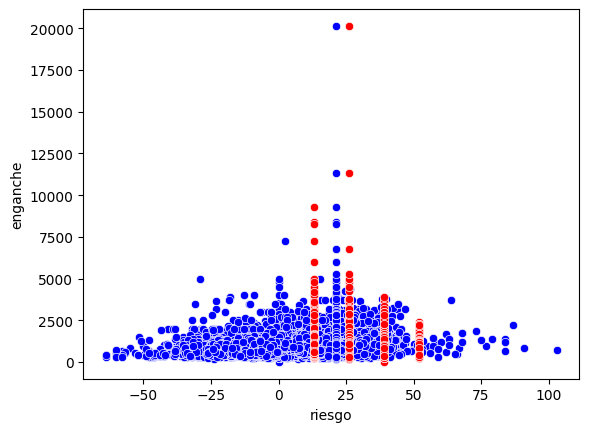

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (enganche) e independiente (riesgo)
#para observar el comportamiento en su dispercion, con linea de regresión represetnada
from turtle import color
sns.scatterplot(x="riesgo", y="enganche", color="blue", data=df)
sns.scatterplot(x="plazo", y="enganche", color="red", data=df)

#Declaramos la variable independientes y dependidentes para la regresion lineal
#Vars_Indep=df[["riesgo","plazo"]]
Vars_Indep=df[["riesgo"]]
Vars_Dep=df["enganche"]

In [ ]:
#Se define model como la funcion de regresion lineal
model_1=LinearRegression()

#Ajustamos el modello con las variables antes declaradas
model_1.fit(X=Vars_Indep, y=Vars_Dep)

#Verificmaos los coeficientes obtenidos para el modelo ajustado
model_1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['riesgo'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6.51295366]),
 'rank_': 1,
 'singular_': array([2525.98784216]),
 'intercept_': 875.7088714711452}

OBTENER EL MODELO MATEMATICO: y=6.51295366x + 875.7088714711452

In [ ]:
#Predecimos el total de accidentes en base a la variable "alcohol"
#y_pred=model.predict(X=df[["alcohol","speeding"]])
y_pred=model_1.predict(X=df[["riesgo"]])

#Insertamos la columna de predicciones de el DataFrame
df.insert(0, "predicciones1", y_pred)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model_1.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter
#y= coeficiente*x+interceptor

0.05239344485202424

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
#y= coeficiente*x+interceptor

0.22889614424892404

<Axes: xlabel='riesgo', ylabel='enganche'>

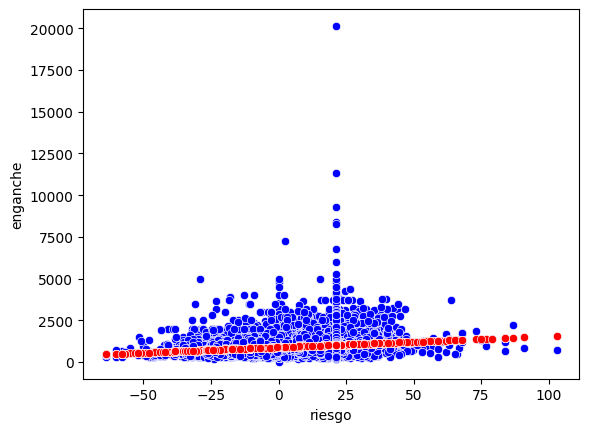

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x="riesgo", y="enganche", color="blue", data=df)
sns.scatterplot(x='riesgo', y='predicciones1', color="red", data=df)

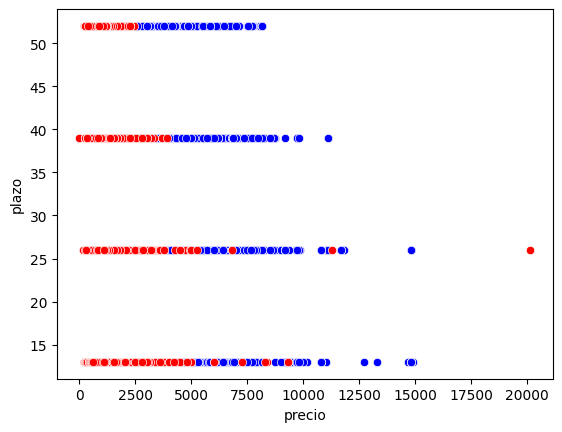

In [ ]:
#Segunda combinacion
#para observar el comportamiento en su dispercion, con linea de regresión represetnada
sns.scatterplot(x='precio', y='plazo', color="blue", data=df)
sns.scatterplot(x="enganche", y="plazo", color="red", data=df)

#Declaramos la variable independientes y dependidentes para la regresion lineal
#Vars_Indep=df[["enganche","precio"]]
Vars_Indep=df[["precio"]]
Vars_Dep=df["plazo"]

In [ ]:
#Se define model como la funcion de regresion lineal
model_2=LinearRegression()

#Ajustamos el modello con las variables antes declaradas
model_2.fit(X=Vars_Indep, y=Vars_Dep)

#Verificmaos los coeficientes obtenidos para el modelo ajustado
model_2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00150129]),
 'rank_': 1,
 'singular_': array([205285.3032759]),
 'intercept_': 19.90894959705299}

OBTENER EL MODELO MATEMATICO: y=0.00150129x + 19.90894959705299

In [ ]:
y_pred2=model_2.predict(X=df[["precio"]])

#Insertamos la columna de predicciones de el DataFrame
df.insert(0, "predicciones2.", y_pred2)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model_2.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter
#y= coeficiente*x+interceptor

0.041877006763330726

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
#y= coeficiente*x+interceptor

0.20463872254128915

<Axes: xlabel='precio', ylabel='plazo'>

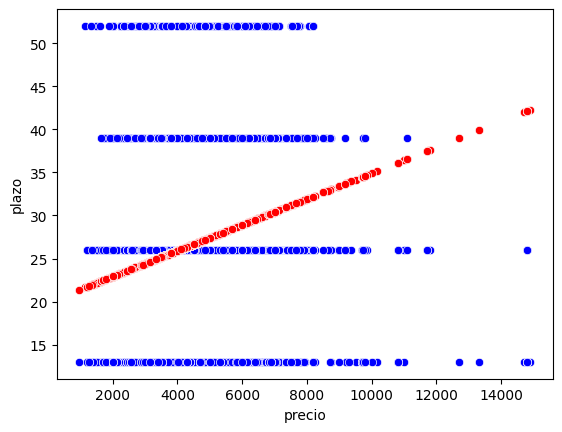

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='precio', y='plazo', color="blue", data=df)
sns.scatterplot(x='precio', y='predicciones2.', color="red", data=df)

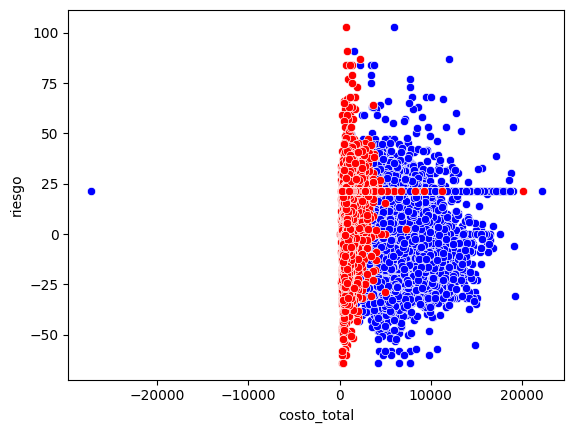

In [ ]:
#Tercera combinacion
#para observar el comportamiento en su dispercion, con linea de regresión represetnada
sns.scatterplot(x='costo_total', y='riesgo', color="blue", data=df)
sns.scatterplot(x="enganche", y="riesgo", color="red", data=df)

#Declaramos la variable independientes y dependidentes para la regresion lineal
#Vars_Indep=df[["enganche","precio"]]
Vars_Indep=df[["costo_total"]]
Vars_Dep=df["riesgo"]

In [ ]:
#Se define model como la funcion de regresion lineal
model_3=LinearRegression()

#Ajustamos el modello con las variables antes declaradas
model_3.fit(X=Vars_Indep, y=Vars_Dep)

#Verificmaos los coeficientes obtenidos para el modelo ajustado
model_3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00079289]),
 'rank_': 1,
 'singular_': array([359751.03527969]),
 'intercept_': 12.308090913391428}

OBTENER EL MODELO MATEMATICO: y=-0.00079289x + 12.308090913391428

In [ ]:
y_pred3=model_3.predict(X=df[["costo_total"]])

#Insertamos la columna de predicciones de el DataFrame
df.insert(0, "predicciones3", y_pred3)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model_3.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter
#y= coeficiente*x+interceptor

0.012751663272599023

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
#y= coeficiente*x+interceptor

0.11292326276104062

<Axes: xlabel='costo_total', ylabel='riesgo'>

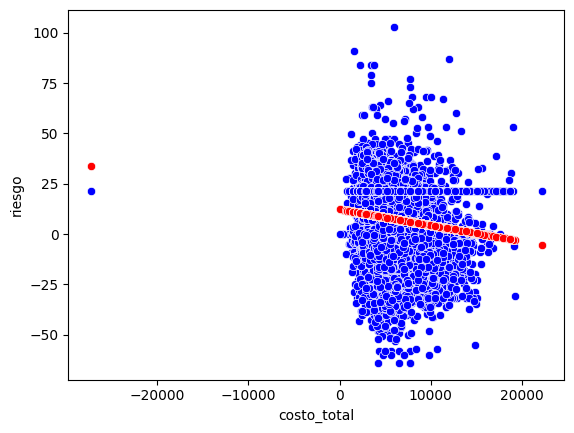

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='costo_total', y='riesgo', color="blue", data=df)
sns.scatterplot(x='costo_total', y='predicciones3', color="red", data=df)

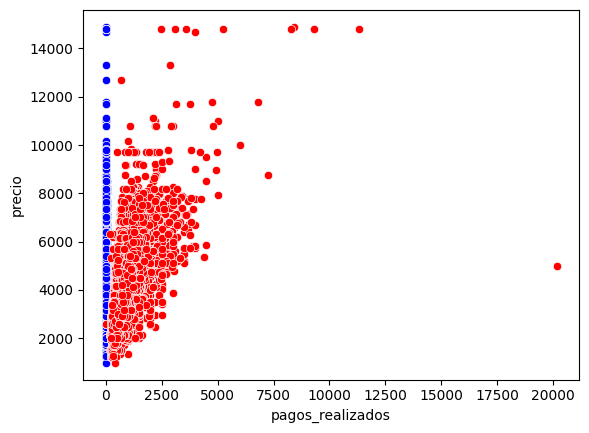

In [ ]:
#Cuarta combinacion
#para observar el comportamiento en su dispercion, con linea de regresión represetnada
sns.scatterplot(x='pagos_realizados', y='precio', color="blue", data=df)
sns.scatterplot(x="enganche", y="precio", color="red", data=df)

#Declaramos la variable independientes y dependidentes para la regresion lineal
#Vars_Indep=df[["enganche","precio"]]
Vars_Indep=df[["pagos_realizados"]]
Vars_Dep=df["precio"]

In [ ]:
#Se define model como la funcion de regresion lineal
model_4=LinearRegression()

#Ajustamos el modello con las variables antes declaradas
model_4.fit(X=Vars_Indep, y=Vars_Dep)

#Verificmaos los coeficientes obtenidos para el modelo ajustado
model_4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['pagos_realizados'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.38408591]),
 'rank_': 1,
 'singular_': array([1463.82068582]),
 'intercept_': 3972.7647404984823}

OBTENER EL MODELO MATEMATICO: y=2.38408591:x + 3972.7647404984823

In [ ]:
y_pred4=model_4.predict(X=df[["pagos_realizados"]])

#Insertamos la columna de predicciones de el DataFrame
df.insert(0, "predicciones4", y_pred4)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model_4.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter
#y= coeficiente*x+interceptor

0.0002890039942433642

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
#y= coeficiente*x+interceptor

0.017000117477340097

<Axes: xlabel='pagos_realizados', ylabel='precio'>

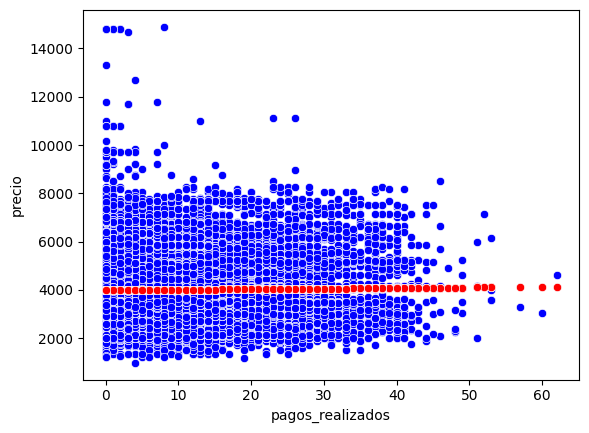

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='pagos_realizados', y='precio', color="blue", data=df)
sns.scatterplot(x='pagos_realizados', y='predicciones4', color="red", data=df)

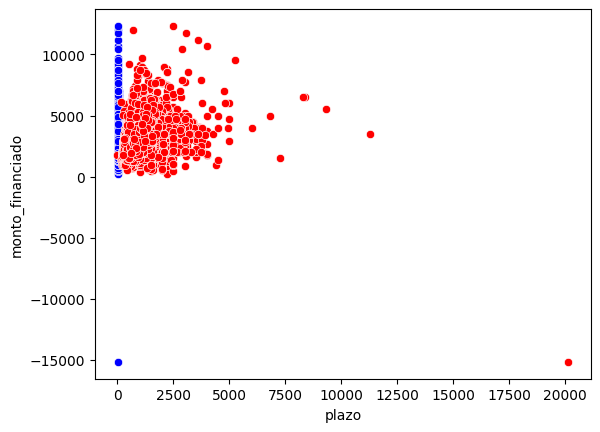

In [ ]:
#Quinta combinacion
#para observar el comportamiento en su dispercion, con linea de regresión represetnada
sns.scatterplot(x='plazo', y='monto_financiado', color="blue", data=df)
sns.scatterplot(x="enganche", y="monto_financiado", color="red", data=df)

#Declaramos la variable independientes y dependidentes para la regresion lineal
#Vars_Indep=df[["enganche","precio"]]
Vars_Indep=df[["plazo"]]
Vars_Dep=df["monto_financiado"]

In [ ]:
#Se define model como la funcion de regresion lineal
model_5=LinearRegression()

#Ajustamos el modello con las variables antes declaradas
model_5.fit(X=Vars_Indep, y=Vars_Dep)

#Verificmaos los coeficientes obtenidos para el modelo ajustado
model_5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['plazo'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([26.86207552]),
 'rank_': 1,
 'singular_': array([1506.03201519]),
 'intercept_': 2380.1495114564595}

OBTENER EL MODELO MATEMATICO: y=26.86207552x + 2380.1495114564595

In [ ]:
y_pred5=model_5.predict(X=df[["plazo"]])

#Insertamos la columna de predicciones de el DataFrame
df.insert(0, "predicciones5", y_pred5)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model_5.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter
#y= coeficiente*x+interceptor

0.059851434175522966

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
#y= coeficiente*x+interceptor

0.244645527601718

<Axes: xlabel='plazo', ylabel='monto_financiado'>

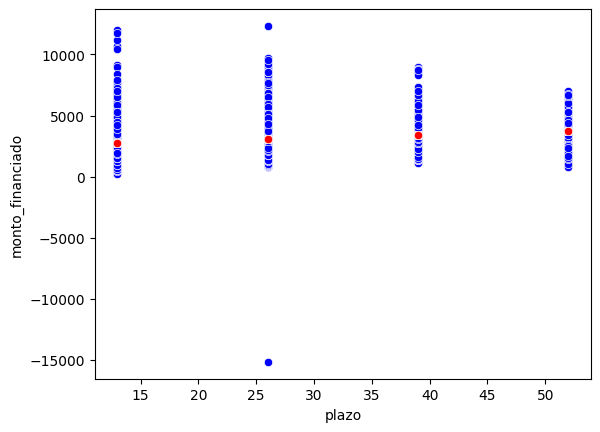

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='plazo', y='monto_financiado', color="blue", data=df)
sns.scatterplot(x='plazo', y='predicciones5', color="red", data=df)

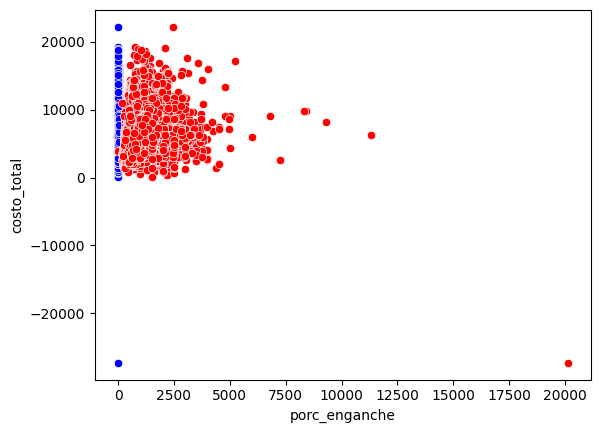

In [ ]:
#Sexta combinacion
#para observar el comportamiento en su dispercion, con linea de regresión represetnada
sns.scatterplot(x='porc_enganche', y='costo_total', color="blue", data=df)
sns.scatterplot(x="enganche", y="costo_total", color="red", data=df)

#Declaramos la variable independientes y dependidentes para la regresion lineal
#Vars_Indep=df[["enganche","precio"]]
Vars_Indep=df[["porc_enganche"]]
Vars_Dep=df["costo_total"]

In [ ]:
#Se define model como la funcion de regresion lineal
model_6=LinearRegression()

#Ajustamos el modello con las variables antes declaradas
model_6.fit(X=Vars_Indep, y=Vars_Dep)

#Verificmaos los coeficientes obtenidos para el modelo ajustado
model_6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['porc_enganche'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.38257273]),
 'rank_': 1,
 'singular_': array([867.26733534]),
 'intercept_': 5702.407213817402}

OBTENER EL MODELO MATEMATICO: y=-3.38257273x + 5702.407213817402

In [ ]:
y_pred6=model_6.predict(X=df[["porc_enganche"]])

#Insertamos la columna de predicciones de el DataFrame
df.insert(0, "predicciones6", y_pred6)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model_6.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter
#y= coeficiente*x+interceptor

6.64960979662732e-05

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
#y= coeficiente*x+interceptor

0.008154513962602137

<Axes: xlabel='porc_enganche', ylabel='costo_total'>

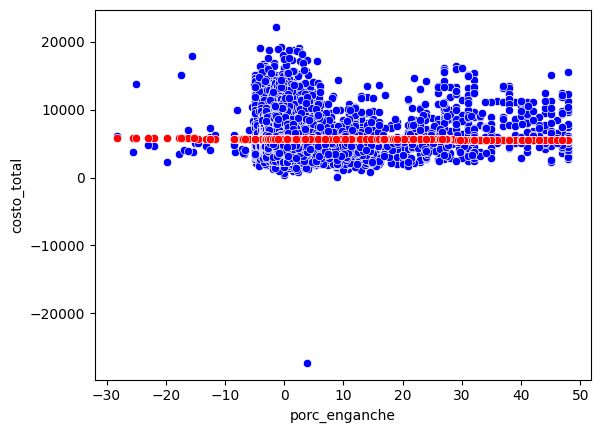

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='porc_enganche', y='costo_total', color="blue", data=df)
sns.scatterplot(x='porc_enganche', y='predicciones6', color="red", data=df)

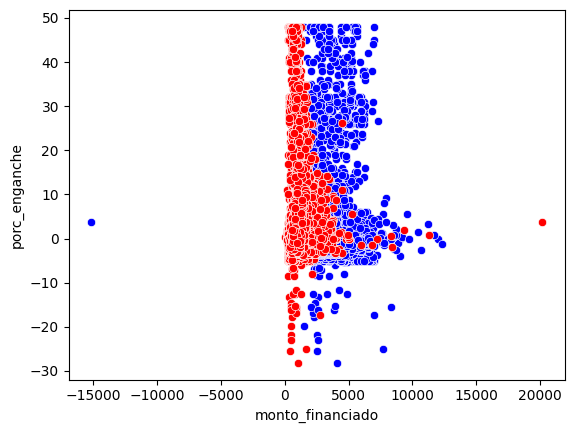

In [ ]:
#Sexta combinacion
#para observar el comportamiento en su dispercion, con linea de regresión represetnada
sns.scatterplot(x='monto_financiado', y='porc_enganche', color="blue", data=df)
sns.scatterplot(x="enganche", y="porc_enganche", color="red", data=df)

#Declaramos la variable independientes y dependidentes para la regresion lineal
#Vars_Indep=df[["enganche","precio"]]
Vars_Indep=df[["monto_financiado"]]
Vars_Dep=df["porc_enganche"]

In [ ]:
#Se define model como la funcion de regresion lineal
model_7=LinearRegression()

#Ajustamos el modello con las variables antes declaradas
model_7.fit(X=Vars_Indep, y=Vars_Dep)

#Verificmaos los coeficientes obtenidos para el modelo ajustado
model_7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.86131624e-05]),
 'rank_': 1,
 'singular_': array([165362.29426739]),
 'intercept_': 0.8906287377512697}

OBTENER EL MODELO MATEMATICO: y=-2.86131624e-05x +  0.8906287377512697

In [ ]:
y_pred7=model_7.predict(X=df[["monto_financiado"]])

#Insertamos la columna de predicciones de el DataFrame
df.insert(0, "predicciones7.", y_pred7)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model_7.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter
#y= coeficiente*x+interceptor

2.9764508822971436e-05

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
#y= coeficiente*x+interceptor

0.0054556859168184745

<Axes: xlabel='monto_financiado', ylabel='porc_enganche'>

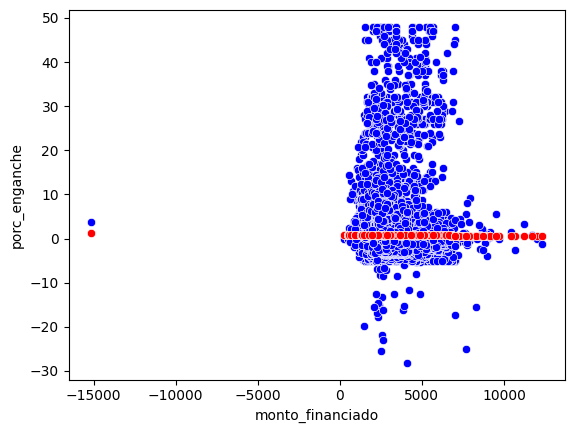

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='monto_financiado', y='porc_enganche', color="blue", data=df)
sns.scatterplot(x='monto_financiado', y='predicciones7.', color="red", data=df)

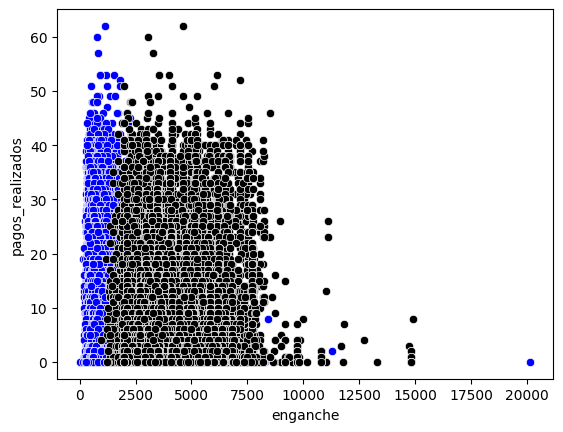

In [ ]:
#Sexta combinacion
#para observar el comportamiento en su dispercion, con linea de regresión represetnada
sns.scatterplot(x='enganche', y='pagos_realizados', color="blue", data=df)
sns.scatterplot(x="precio", y="pagos_realizados", color="black", data=df)

#Declaramos la variable independientes y dependidentes para la regresion lineal
#Vars_Indep=df[["enganche","precio"]]
Vars_Indep=df[["enganche"]]
Vars_Dep=df["pagos_realizados"]

In [ ]:
#Se define model como la funcion de regresion lineal
model_8=LinearRegression()

#Ajustamos el modello con las variables antes declaradas
model_8.fit(X=Vars_Indep, y=Vars_Dep)

#Verificmaos los coeficientes obtenidos para el modelo ajustado
model_8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['enganche'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00164419]),
 'rank_': 1,
 'singular_': array([71873.82651082]),
 'intercept_': 11.704020323069809}

OBTENER EL MODELO MATEMATICO: y=-0.00164419x + 11.704020323069809

In [ ]:
y_pred8=model_8.predict(X=df[["enganche"]])

#Insertamos la columna de predicciones de el DataFrame
df.insert(0, "predicciones8", y_pred8)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model_8.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter
#y= coeficiente*x+interceptor

0.006517354081024274

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
#y= coeficiente*x+interceptor

0.08073013118423798

<Axes: xlabel='enganche', ylabel='pagos_realizados'>

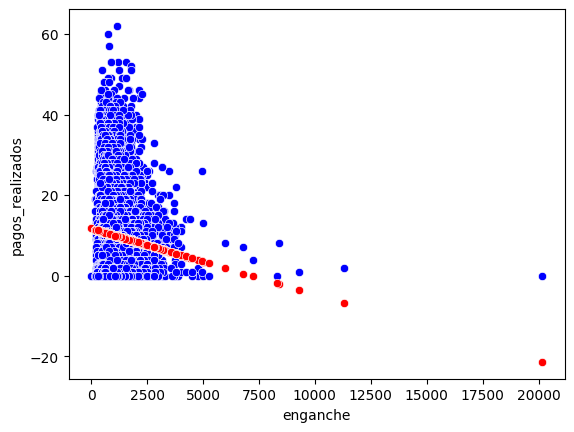

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='enganche', y='pagos_realizados', color="blue", data=df)
sns.scatterplot(x='enganche', y='predicciones8', color="red", data=df)